Rossmann sales predictions by using fastai-deeplearning library:

In [1]:
%reload_ext autoreload
%autoreload 2

In [1]:
from fastai.tabular import *

In [3]:
path='.'

In [4]:
train_df = pd.read_pickle('train_clean')
test_df = pd.read_pickle('test_clean')

In [5]:
#function to display a dataframe up to 200 rows and columns
def display_all(df):
    with pd.option_context("display.max_rows", 200, "display.max_columns", 200): 
        display(df)

In [6]:
display_all(train_df.head().T)

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,0,0,0,0,0
SchoolHoliday,1,1,1,1,1


In [53]:
train_df.head()

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,Promo_bw,SchoolHoliday_fw,Promo_fw
0,0,1,5,2015-07-31,5263,555,1,1,0,1,...,0,0,0,0,0,0,5.0,5.0,7.0,5.0
1,1,2,5,2015-07-31,6064,625,1,1,0,1,...,0,0,0,0,0,0,5.0,5.0,1.0,1.0
2,2,3,5,2015-07-31,8314,821,1,1,0,1,...,0,0,0,0,0,0,5.0,5.0,5.0,5.0
3,3,4,5,2015-07-31,13995,1498,1,1,0,1,...,0,0,0,0,0,0,5.0,5.0,1.0,1.0
4,4,5,5,2015-07-31,4822,559,1,1,0,1,...,0,0,0,0,0,0,5.0,5.0,1.0,1.0


In [54]:
test_df.head()

,index,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,...,AfterSchoolHoliday,BeforeSchoolHoliday,AfterStateHoliday,BeforeStateHoliday,AfterPromo,BeforePromo,SchoolHoliday_bw,Promo_bw,SchoolHoliday_fw,Promo_fw
0,0,1,1,4,2015-09-17,1.0,1,0,0,2015,...,13,0,0,0,0,0,0.0,4.0,0.0,1.0
1,1,2,3,4,2015-09-17,1.0,1,0,0,2015,...,37,0,0,0,0,0,0.0,4.0,0.0,1.0
2,2,3,7,4,2015-09-17,1.0,1,0,0,2015,...,20,0,0,0,0,0,0.0,4.0,0.0,1.0
3,3,4,8,4,2015-09-17,1.0,1,0,0,2015,...,20,0,0,0,0,0,0.0,4.0,0.0,1.0
4,4,5,9,4,2015-09-17,1.0,1,0,0,2015,...,37,0,0,0,0,0,0.0,4.0,0.0,1.0


In [6]:
len(train_df), len(test_df)

(844338, 41088)

In [6]:
#These are our processors:
procs=[FillMissing, Categorify, Normalize]

In [52]:
#Setting categorical and continuous vars.:
cat_vars = ['Store', 'DayOfWeek', 'Year', 'Month', 'Day', 'StateHoliday', 'CompetitionMonthsOpen',
    'Promo2Weeks', 'StoreType', 'Assortment', 'PromoInterval', 'CompetitionOpenSinceYear', 'Promo2SinceYear',
    'State', 'Week', 'Events', 'Promo_fw', 'Promo_bw','SchoolHoliday_fw', 'SchoolHoliday_bw']

cont_vars = ['CompetitionDistance', 'Max_TemperatureC', 'Mean_TemperatureC', 'Min_TemperatureC',
   'Max_Humidity', 'Mean_Humidity', 'Min_Humidity', 'Max_Wind_SpeedKm_h', 
   'Mean_Wind_SpeedKm_h', 'CloudCover', 'trend', 'trend_DE',
   'AfterStateHoliday', 'BeforeStateHoliday', 'Promo', 'SchoolHoliday']

In [52]:
columns_not_used = []
for i in train_df.columns:
    if i not in cat_vars+cont_vars:
        columns_not_used.append(i)
columns_not_used

['index',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Dayofweek',
 'Dayofyear',
 'Is_month_end',
 'Is_month_start',
 'Is_quarter_end',
 'Is_quarter_start',
 'Is_year_end',
 'Is_year_start',
 'Elapsed',
 'CompetitionOpenSinceMonth',
 'Promo2',
 'Promo2SinceWeek',
 'file',
 'week',
 'file_DE',
 'week_DE',
 'Date_DE',
 'State_DE',
 'Month_DE',
 'Day_DE',
 'Dayofweek_DE',
 'Dayofyear_DE',
 'Is_month_end_DE',
 'Is_month_start_DE',
 'Is_quarter_end_DE',
 'Is_quarter_start_DE',
 'Is_year_end_DE',
 'Is_year_start_DE',
 'Elapsed_DE',
 'Dew_PointC',
 'MeanDew_PointC',
 'Min_DewpointC',
 'Max_Sea_Level_PressurehPa',
 'Mean_Sea_Level_PressurehPa',
 'Min_Sea_Level_PressurehPa',
 'Max_VisibilityKm',
 'Mean_VisibilityKm',
 'Min_VisibilitykM',
 'Max_Gust_SpeedKm_h',
 'Precipitationmm',
 'WindDirDegrees',
 'StateName',
 'CompetitionOpenSince',
 'CompetitionDaysOpen',
 'Promo2Since',
 'Promo2Days',
 'AfterSchoolHoliday',
 'BeforeSchoolHoliday',
 'AfterPromo',
 'BeforePromo']

In [6]:
display_all(train_df.head().T)

,0,1,2,3,4
index,0,1,2,3,4
Store,1,2,3,4,5
DayOfWeek,5,5,5,5,5
Date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
Sales,5263,6064,8314,13995,4822
Customers,555,625,821,1498,559
Open,1,1,1,1,1
Promo,1,1,1,1,1
StateHoliday,0,0,0,0,0
SchoolHoliday,1,1,1,1,1


In [55]:
#dependent variable
dep_var = 'Sales'
df = train_df[cat_vars + cont_vars + [dep_var,'Date']].copy()

In [23]:
test_df['Date'].min(), test_df['Date'].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [24]:
train_df['Date'].min(), train_df['Date'].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [56]:
#Go to len(test_df)th date on the train_df and since there are more that 1000 from that day, bring index of the last one.
#We are going to cut the set for training and validation. We want a validation set similar to test set in size. 
#Validation set is from end of the training_set(to make it similar to test set) and we will cut from somewhere aparts date.
cut = train_df['Date'][(train_df['Date'] == train_df['Date'][len(test_df)])].index.max()
cut

41395

In [57]:
valid_idx = range(cut)

In [11]:
df[dep_var].head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

In [68]:
#Making our databunch:
data = (TabularList.from_df(df, path=path, cat_names=cat_vars, cont_names=cont_vars, procs=procs,)
                .split_by_idx(valid_idx)
                .label_from_df(cols=dep_var, label_cls=FloatList, log=True) 
                .add_test(TabularList.from_df(test_df, path=path, cat_names=cat_vars, cont_names=cont_vars))
                .databunch())

In [31]:
#y_range is the range we want to put our y's at last layer.(target)
#take maximum of sales column and make it little wider. then take the log. that is max y_range.
max_log_y = np.log(np.max(train_df['Sales'])*1.2) 
y_range = torch.tensor([0, max_log_y], device=defaults.device)

In [34]:
learn = tabular_learner(data, layers=[1000,500], ps=[0.001,0.01], emb_drop=0.04, 
                        y_range=y_range, metrics=exp_rmspe)
#ps is probablity of dropout for each layer.

In [35]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(1116, 81)
    (1): Embedding(8, 5)
    (2): Embedding(4, 3)
    (3): Embedding(13, 7)
    (4): Embedding(32, 11)
    (5): Embedding(6, 4)
    (6): Embedding(26, 10)
    (7): Embedding(27, 10)
    (8): Embedding(5, 4)
    (9): Embedding(4, 3)
    (10): Embedding(4, 3)
    (11): Embedding(24, 9)
    (12): Embedding(9, 5)
    (13): Embedding(13, 7)
    (14): Embedding(53, 15)
    (15): Embedding(22, 9)
    (16): Embedding(7, 5)
    (17): Embedding(7, 5)
    (18): Embedding(9, 5)
    (19): Embedding(9, 5)
    (20): Embedding(3, 3)
    (21): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.04, inplace=False)
  (bn_cont): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=228, out_features=1000, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(1000, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.001, inplace=Fa

In [36]:
len(data.train_ds.cont_names)

16

In [37]:
learn.lr_find()

epoch,train_loss,valid_loss,exp_rmspe,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


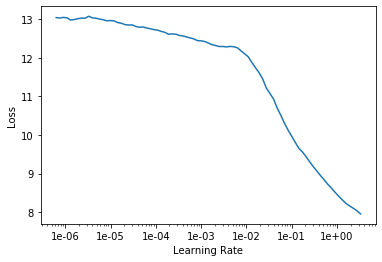

In [38]:
learn.recorder.plot()

In [39]:
learn.fit_one_cycle(5, 1e-3, wd=0.2)

epoch,train_loss,valid_loss,exp_rmspe,time
0,0.026831,0.024647,0.147374,13:19
1,0.021273,0.020104,0.137378,14:22
2,0.017232,0.024481,0.134188,14:31
3,0.013405,0.014017,0.112924,17:00
4,0.010948,0.012902,0.108226,21:23


In [40]:
learn.save('1')

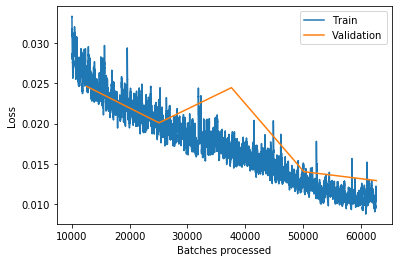

In [41]:
learn.recorder.plot_losses(skip_start=10000)

In [42]:
learn.load('1');

In [43]:
test_preds=learn.get_preds(DatasetType.Test)

In [ ]:
test_df["Sales"]=np.exp(test_preds[0].data).numpy().T[0]

test_df[["Id","Sales"]]=test_df[["Id","Sales"]].astype("int")

test_df[["Id","Sales"]].to_csv("rossmann_submission.csv",index=False)

In [50]:
pd.read_csv('rossmann_submission.csv')

,Id,Sales
0,1,4385
1,2,7000
2,3,8950
3,4,6823
4,5,7360
...,...,...
41083,41084,2873
41084,41085,7078
41085,41086,5854
41086,41087,22792
